<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/main/Data_Exploration_Using_SMOTE_0217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
pip install imbalanced-learn

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve

In [18]:
df = pd.read_csv('cuisines.csv')

In [5]:
df.shape

(2448, 385)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [7]:
df.describe()

,Unnamed: 0,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,2448.000000,2448.000000,2448.0,2448.000000,2448.000000,2448.000000,2448.0,2448.000000,2448.0,2448.000000,...,2448.0,2448.000000,2448.000000,2448.000000,2448.000000,2448.0,2448.000000,2448.000000,2448.000000,2448.000000
mean,16040.551471,0.018382,0.0,0.000408,0.002859,0.013889,0.0,0.005310,0.0,0.002451,...,0.0,0.000817,0.020833,0.004085,0.067810,0.0,0.001634,0.015523,0.059232,0.008578
std,13625.719887,0.134357,0.0,0.020211,0.053408,0.117054,0.0,0.072694,0.0,0.049457,...,0.0,0.028577,0.142855,0.063796,0.251472,0.0,0.040398,0.123645,0.236107,0.092241
min,65.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,10907.750000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,15263.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,16926.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,57690.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


<Axes: >

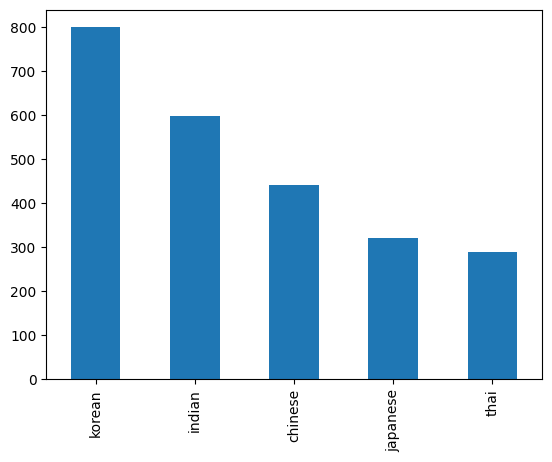

In [12]:
df['cuisine'].value_counts().plot.bar()

In [34]:
def create_ingredient_df(df):
  df = df.T.drop(['Unnamed: 0','cuisine'],axis=0).sum(axis=1).to_frame('values')
  return df.sort_values(('values'),ascending = False)

In [31]:
thai_food = df[df['cuisine'] == 'thai']

In [32]:
thai_food

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
274,2333,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,2334,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,2335,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,2336,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,2337,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,55615,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2359,55616,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2360,55617,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2361,55618,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
create_ingredient_df(thai_food)

,values
garlic,173.0
fish,153.0
cayenne,136.0
cilantro,121.0
ginger,114.0
...,...
mozzarella_cheese,0.0
mung_bean,0.0
munster_cheese,0.0
muscat_grape,0.0


In [36]:
X = df.drop(['Unnamed: 0','cuisine','rice','garlic','ginger'], axis =1 )
y = df['cuisine']

In [42]:
smote = SMOTE()
1.34

In [43]:
type(smote)

imblearn.over_sampling._smote.base.SMOTE

In [ ]:
model = LinearRegression()
